# Example Notebook

A short collection of examples for various Python scientific libraries.

## Initial Setup

Import libraries and run a few commands to set things up for the following examples:

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy import config

import matplotlib.pyplot as plt
import numpy as np
import os

from scipy import optimize
from scipy.interpolate import interp1d
import seaborn as sns
from sympy import symbols, exp, sin, cos, diff, integrate, init_printing

# Display matplotlib plots inline
%matplotlib inline

# Print sympy expressions as formatted equations
init_printing()

# Seed the random number generator for reproducibility
np.random.seed(0)

## Formatted Text & Equations

In Markdown cells (like this one), you can write plain text or add formatting and other elements with [Markdown](https://www.markdownguide.org/getting-started). These include headers, **bold text**, *italic text*, hyperlinks, equations $A=\pi r^2$, inline code `print('Hello world!')`, bulleted lists, and more.

- One item
- Another item
  - A sub-item
- More stuff

#### Example: Maxwell's Equations

$$
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}
$$

## Seaborn: Statistical Data Visualization

Load the example Fisher's iris dataset from the `seaborn` library and display the first few rows:

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Plot pairwise relationships in the dataset:

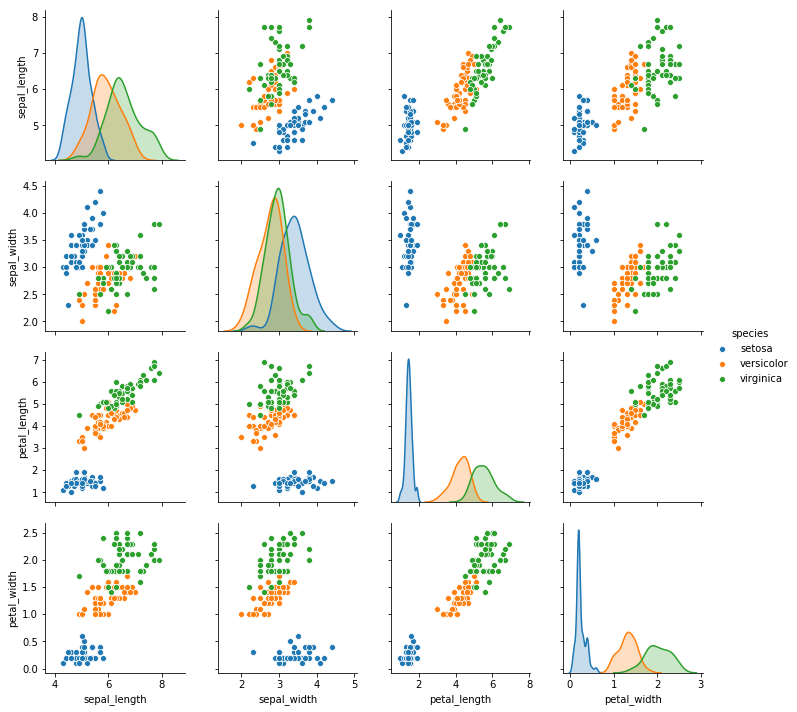

In [3]:
sns.pairplot(data=iris, hue='species');

## Scipy: Scientific & Numerical Tools

### 1-D Interpolation

Example from: http://www.scipy-lectures.org/intro/scipy.html

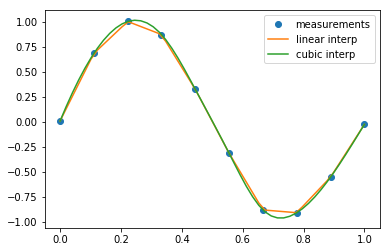

In [4]:
# Generate data
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * (np.random.random(10)*2 - 1)
measures = np.sin(2 * np.pi * measured_time) + noise

# Interpolate it to new time points
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

# Plot the data and the interpolation
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measurements')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend();

### Curve Fitting

Example from: http://www.scipy-lectures.org/intro/scipy.html

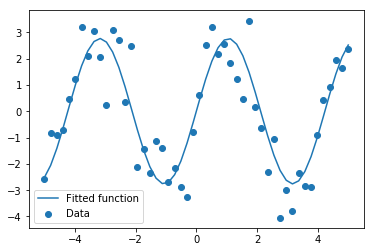

In [5]:
# Generate data
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# Fit a simple sine function to the data (non-linear least squares optimization)
def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

# And plot it
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')
plt.legend();

## Sympy: Symbolic Computing


Compute the derivative:

$$
\frac{\mathrm{d}}{\mathrm{d}x}e^xsin(x)
$$

In [6]:
x = symbols('x')
diff(exp(x) * sin(x), x)

Compute the integral:

$$
\int(e^xsin(x) + e^xcos(x))\mathrm{d}x
$$

In [7]:
expr = exp(x) * sin(x) + exp(x) * cos(x)
integrate(expr, x)

## Cartopy: Maps & Geospatial Data

### Geodetic & PlateCarree Lines

Example from: https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html

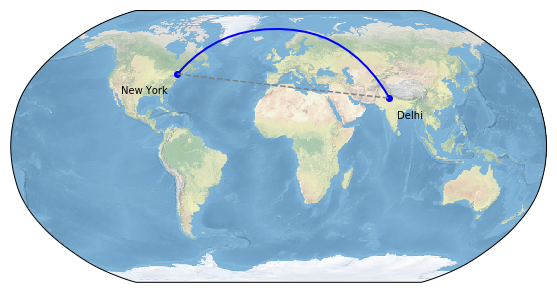

In [8]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic());

### Geo-Referenced Images

Example from: https://scitools.org.uk/cartopy/docs/latest/matplotlib/advanced_plotting.html

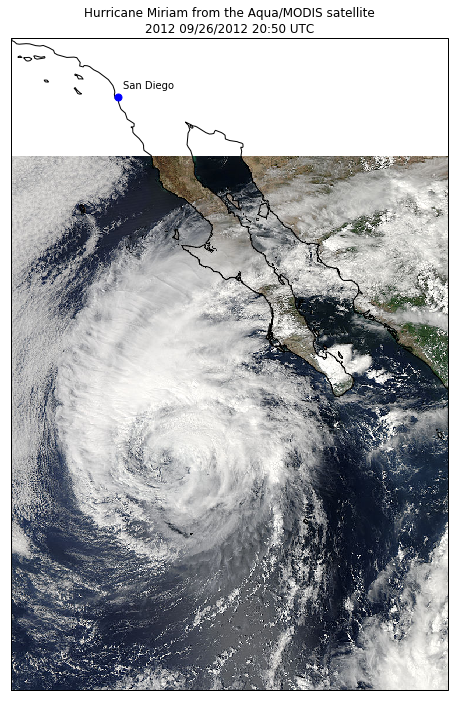

In [9]:
fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
                     )
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic());

### State & Province Boundaries

Map of Canada in Lambert Conformal Conic projection, showing Canadian provinces. Example from: 
https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/

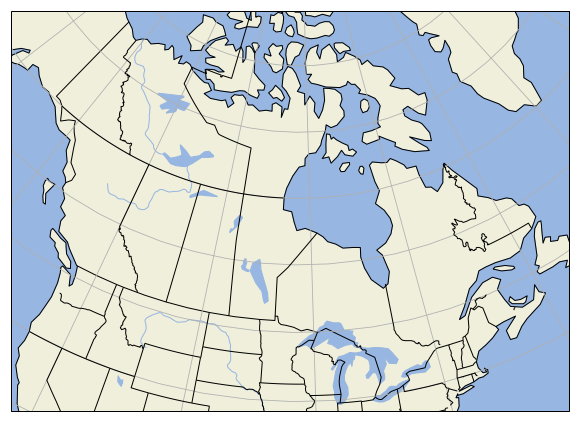

In [10]:
# Boundaries for map of Canada
canada_east = -63
canada_west = -123
canada_north = 75
canada_south = 37

standard_parallels = (49, 77)
central_longitude = -(91 + 52 / 60)

provinces_50m = cfeature.NaturalEarthFeature('cultural',
                                             'admin_1_states_provinces_lines',
                                             '50m',
                                             facecolor='none')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(provinces_50m, edgecolor='black', zorder=2);